In [12]:
import rasterio as rio
from rasterio.mask import mask
import geopandas as gpd

In [4]:
carb_hucs = gpd.read_file('share/outputs/processed_hucs.shp')

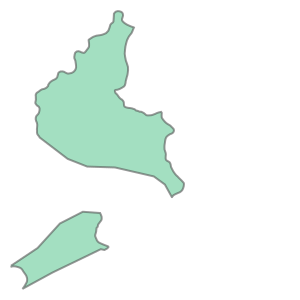

In [8]:
carb_hucs.iloc[0].geometry

In [2]:
mukey_src = rio.open('/home/mcoving/Dropbox/sync/projects/Dolines/comparison_data/gNATSGO/FY2024_gNATSGO_mukey_grid.tif')

In [13]:
mukey, out_transform = mask(mukey_src, [carb_hucs.iloc[0].geometry], crop=True)

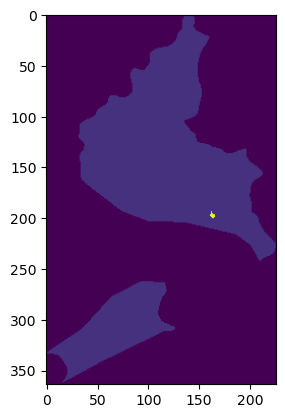

In [16]:
import matplotlib.pyplot as plt

plt.imshow(mukey[0])

In [21]:
import numpy as np
huc_mukeys = np.unique(mukey)
huc_mukeys = huc_mukeys[huc_mukeys>0]

In [22]:
huc_mukeys

array([ 422095,  422100,  422101,  422103,  422104,  422105,  422106,
        422107,  422108,  422110,  422114,  422115,  422117,  422118,
        422119,  422120,  422121,  422122,  422123,  422125,  422128,
        422129,  422130,  422131,  422132,  422134,  422136,  422137,
        422138,  422139,  422140,  422141,  422142,  422145,  422150,
        422151,  422153,  422154,  422155,  422156,  422158,  422159,
        422160,  422161,  422162,  422163,  422164,  422165,  422166,
        422172,  422176,  422178,  422180,  422183,  422184,  422185,
        422186,  422187,  422188,  422189,  422190,  422191,  422192,
        422193,  422194,  422195,  422196,  422197,  422198,  422199,
        422200,  422201,  422202,  422203,  422205,  422206,  422207,
        422208,  422209,  422210, 3000299], dtype=int32)

In [23]:
import pandas as pd

In [57]:
component_table = pd.read_csv('/home/mcoving/Dropbox/sync/projects/Dolines/comparison_data/gNATSGO/gNATSGO_CONUS_component.csv', low_memory=False)

In [58]:
huc_comp = component_table[component_table.mukey.isin(huc_mukeys)]

In [39]:
huc_comp.keys().to_list()

['OBJECTID',
 'comppct_l',
 'comppct_r',
 'comppct_h',
 'compname',
 'compkind',
 'majcompflag',
 'otherph',
 'localphase',
 'slope_l',
 'slope_r',
 'slope_h',
 'slopelenusle_l',
 'slopelenusle_r',
 'slopelenusle_h',
 'runoff',
 'tfact',
 'wei',
 'weg',
 'erocl',
 'earthcovkind1',
 'earthcovkind2',
 'hydricon',
 'hydricrating',
 'drainagecl',
 'elev_l',
 'elev_r',
 'elev_h',
 'aspectccwise',
 'aspectrep',
 'aspectcwise',
 'geomdesc',
 'albedodry_l',
 'albedodry_r',
 'albedodry_h',
 'airtempa_l',
 'airtempa_r',
 'airtempa_h',
 'map_l',
 'map_r',
 'map_h',
 'reannualprecip_l',
 'reannualprecip_r',
 'reannualprecip_h',
 'ffd_l',
 'ffd_r',
 'ffd_h',
 'nirrcapcl',
 'nirrcapscl',
 'nirrcapunit',
 'irrcapcl',
 'irrcapscl',
 'irrcapunit',
 'cropprodindex',
 'constreeshrubgrp',
 'wndbrksuitgrp',
 'rsprod_l',
 'rsprod_r',
 'rsprod_h',
 'foragesuitgrpid',
 'wlgrain',
 'wlgrass',
 'wlherbaceous',
 'wlshrub',
 'wlconiferous',
 'wlhardwood',
 'wlwetplant',
 'wlshallowwat',
 'wlrangeland',
 'wlopenla

In [116]:
huc_comp.cokey.values.astype('float')

array([24434343., 24434344., 24434345., 24434346., 24434347., 24434348.,
       24434182., 24434183., 24434401., 24434402., 24434403., 24434404.,
       24434405., 24434406., 24434407., 24434408., 24434409., 24434410.,
       24434411., 24434412., 24434413., 24434349., 24434350., 24434351.,
       24434352., 24434353., 24434354., 24434355., 24434356., 24434357.,
       24434358., 24434359., 24434360., 24434185., 24434186., 24434188.,
       24434191., 24434192., 24434194., 24434195., 24434196., 24434197.,
       24434198., 24434199., 24434200., 24434201., 24434202., 24434203.,
       24434204., 24434205., 24434206., 24434207., 24434211., 24434213.,
       24434214., 24434215., 24434216., 24434217., 24434218., 24434221.,
       24434224., 24434225., 24434226., 24434227., 24434228., 24434229.,
       24434230., 24434231., 24434232., 24434233., 24434337., 24434338.,
       24434339., 24434340., 24434341., 24434342., 24434234., 24434235.,
       24434318., 24434319., 24434243., 24434244., 

In [122]:
horizon_table.cokey==24629637#[horizon_table.cokey.isin(huc_comp.cokey)]

0         True
1         True
2        False
3        False
4        False
         ...  
63160    False
63161    False
63162    False
63163    False
63164    False
Name: cokey, Length: 63165, dtype: bool

In [113]:
for cokey in huc_comp.cokey.values.astype('float'):
    print(horizon_table[horizon_table.cokey==cokey])

Empty DataFrame
Columns: [OBJECTID, hzname, desgndisc, desgnmaster, desgnmasterprime, desgnvert, hzdept_l, hzdept_r, hzdept_h, hzdepb_l, hzdepb_r, hzdepb_h, hzthk_l, hzthk_r, hzthk_h, fraggt10_l, fraggt10_r, fraggt10_h, frag3to10_l, frag3to10_r, frag3to10_h, sieveno4_l, sieveno4_r, sieveno4_h, sieveno10_l, sieveno10_r, sieveno10_h, sieveno40_l, sieveno40_r, sieveno40_h, sieveno200_l, sieveno200_r, sieveno200_h, sandtotal_l, sandtotal_r, sandtotal_h, sandvc_l, sandvc_r, sandvc_h, sandco_l, sandco_r, sandco_h, sandmed_l, sandmed_r, sandmed_h, sandfine_l, sandfine_r, sandfine_h, sandvf_l, sandvf_r, sandvf_h, silttotal_l, silttotal_r, silttotal_h, siltco_l, siltco_r, siltco_h, siltfine_l, siltfine_r, siltfine_h, claytotal_l, claytotal_r, claytotal_h, claysizedcarb_l, claysizedcarb_r, claysizedcarb_h, om_l, om_r, om_h, dbtenthbar_l, dbtenthbar_r, dbtenthbar_h, dbthirdbar_l, dbthirdbar_r, dbthirdbar_h, dbfifteenbar_l, dbfifteenbar_r, dbfifteenbar_h, dbovendry_l, dbovendry_r, dbovendry_h, par

In [59]:
huc_cokeys = huc_comp.cokey.values

In [56]:
horizon_table = pd.read_csv('/home/mcoving/Dropbox/sync/projects/Dolines/comparison_data/gNATSGO/gNATSGO_CONUS_chorizon.csv', low_memory=False)

In [94]:
huc_horiz = horizon_table[horizon_table.cokey.isin(fixed_cokeys)]
huc_horiz

,OBJECTID,hzname,desgndisc,desgnmaster,desgnmasterprime,desgnvert,hzdept_l,hzdept_r,hzdept_h,hzdepb_l,...,ph2osoluble_l,ph2osoluble_r,ph2osoluble_h,ptotal_l,ptotal_r,ptotal_h,excavdifcl,excavdifms,cokey,chkey
0,1,C,NaN,C,NaN,2.0,NaN,20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24629637.0,73203533.0
1,2,A,NaN,A,NaN,1.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24629637.0,73203532.0
2,3,C1...C5,NaN,C,NaN,2.0,NaN,20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24630059.0,73204462.0
3,4,Ap,NaN,A,NaN,1.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24630059.0,73204461.0
4,5,Bt,NaN,B,NaN,2.0,NaN,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24630061.0,73204464.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63159,63160,C,NaN,C,NaN,NaN,40.0,102,142.0,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24013365.0,71401725.0
63160,63161,Ap,NaN,A,NaN,NaN,0.0,0,0.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24013365.0,71401724.0
63161,63162,Bk,NaN,B,NaN,NaN,15.0,18,25.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24013365.0,71401726.0
63162,63163,Bw,NaN,B,NaN,NaN,15.0,18,23.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24013366.0,71401728.0


In [91]:
horizon_table.cokey

0        24629637.0
1        24629637.0
2        24630059.0
3        24630059.0
4        24630061.0
            ...    
63160    24013365.0
63161    24013365.0
63162    24013366.0
63163    24013366.0
63164           NaN
Name: cokey, Length: 63165, dtype: float64

[24629854,
 24629855,
 24629637,
 24629638,
 24629639,
 24630059,
 24630060,
 24630061,
 24630062,
 24630063,
 24630064,
 24630065,
 24630066,
 24630067,
 24630068,
 24630847,
 24630848,
 24630849,
 24630850,
 24631034,
 24631035,
 24631036,
 24631037,
 24631038,
 24629601,
 24629602,
 24629603,
 24629604,
 24630069,
 24630070,
 24629640,
 24629641,
 24630037,
 24630038,
 24630039,
 24629942,
 24629943,
 24629944,
 24629945,
 24629946,
 24629856,
 24629857,
 24629858,
 24629642,
 24629643,
 24629644,
 24629645,
 24629859,
 24629860,
 24629826,
 24629827,
 24629828,
 24629829,
 24629646,
 24629647,
 24629648,
 24629649,
 24630841,
 24630842,
 24630843,
 24630844,
 24630845,
 24630846,
 24630579,
 24630580,
 24630581,
 24630582,
 24630744,
 24630745,
 24630746,
 24630747,
 24630748,
 24630944,
 24630945,
 24630946,
 24630947,
 24630948,
 24630261,
 24630262,
 24630263,
 24630264,
 24630265,
 24630266,
 24630267,
 24630268,
 24630269,
 24630270,
 24630271,
 24630272,
 24629605,
 24629606,

In [92]:
horizon_table[horizon_table.cokey==fixed_cokeys[1]]

,OBJECTID,hzname,desgndisc,desgnmaster,desgnmasterprime,desgnvert,hzdept_l,hzdept_r,hzdept_h,hzdepb_l,...,ph2osoluble_l,ph2osoluble_r,ph2osoluble_h,ptotal_l,ptotal_r,ptotal_h,excavdifcl,excavdifms,cokey,chkey


In [62]:
huc_cokeys

array(['24434343', '24434344', '24434345', '24434346', '24434347',
       '24434348', '24434182', '24434183', '24434401', '24434402',
       '24434403', '24434404', '24434405', '24434406', '24434407',
       '24434408', '24434409', '24434410', '24434411', '24434412',
       '24434413', '24434349', '24434350', '24434351', '24434352',
       '24434353', '24434354', '24434355', '24434356', '24434357',
       '24434358', '24434359', '24434360', '24434185', '24434186',
       '24434188', '24434191', '24434192', '24434194', '24434195',
       '24434196', '24434197', '24434198', '24434199', '24434200',
       '24434201', '24434202', '24434203', '24434204', '24434205',
       '24434206', '24434207', '24434211', '24434213', '24434214',
       '24434215', '24434216', '24434217', '24434218', '24434221',
       '24434224', '24434225', '24434226', '24434227', '24434228',
       '24434229', '24434230', '24434231', '24434232', '24434233',
       '24434337', '24434338', '24434339', '24434340', '244343

In [63]:
horizon_table[horizon_table.cokey == 24629637]

,OBJECTID,hzname,desgndisc,desgnmaster,desgnmasterprime,desgnvert,hzdept_l,hzdept_r,hzdept_h,hzdepb_l,...,ph2osoluble_l,ph2osoluble_r,ph2osoluble_h,ptotal_l,ptotal_r,ptotal_h,excavdifcl,excavdifms,cokey,chkey
0,1,C,NaN,C,NaN,2.0,NaN,20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24629637.0,73203533.0
1,2,A,NaN,A,NaN,1.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24629637.0,73203532.0


In [73]:
component_table[component_table.cokey=='24629637']

,OBJECTID,comppct_l,comppct_r,comppct_h,compname,compkind,majcompflag,otherph,localphase,slope_l,...,flsoilleachpot,flsoirunoffpot,fltemik2use,fltriumph2use,indraingrp,innitrateleachi,misoimgmtgrp,vasoimgtgrp,mukey,cokey
2,3,NaN,30.0,NaN,Menahga,Series,Yes,LOW PPT,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398853,24629637


In [72]:
component_table.cokey

False

In [87]:
fixed_cokeys = []
for i, cokey in enumerate(component_table.cokey):
    cokey_split = cokey.split(':')
    #print(cokey_split)
    if len(cokey_split) == 1:
        cokey_int = int(cokey_split[0])
    elif len(cokey_split) == 2:
        cokey_int = int(cokey_split[1])
    else:
        #print("wtf? cokey =",cokey)
        cokey_int = 0
    fixed_cokeys.append(cokey_int)

In [88]:
fixed_cokeys

[24629854,
 24629855,
 24629637,
 24629638,
 24629639,
 24630059,
 24630060,
 24630061,
 24630062,
 24630063,
 24630064,
 24630065,
 24630066,
 24630067,
 24630068,
 24630847,
 24630848,
 24630849,
 24630850,
 24631034,
 24631035,
 24631036,
 24631037,
 24631038,
 24629601,
 24629602,
 24629603,
 24629604,
 24630069,
 24630070,
 24629640,
 24629641,
 24630037,
 24630038,
 24630039,
 24629942,
 24629943,
 24629944,
 24629945,
 24629946,
 24629856,
 24629857,
 24629858,
 24629642,
 24629643,
 24629644,
 24629645,
 24629859,
 24629860,
 24629826,
 24629827,
 24629828,
 24629829,
 24629646,
 24629647,
 24629648,
 24629649,
 24630841,
 24630842,
 24630843,
 24630844,
 24630845,
 24630846,
 24630579,
 24630580,
 24630581,
 24630582,
 24630744,
 24630745,
 24630746,
 24630747,
 24630748,
 24630944,
 24630945,
 24630946,
 24630947,
 24630948,
 24630261,
 24630262,
 24630263,
 24630264,
 24630265,
 24630266,
 24630267,
 24630268,
 24630269,
 24630270,
 24630271,
 24630272,
 24629605,
 24629606,